# IMPORTS & DRIVE CONNECTIONS

In [ ]:
!pip install SimpleITK


from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 28.8 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
import sys
import numpy as np
import os
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

import SimpleITK as sitk

from google.colab.patches import cv2_imshow

In [ ]:
import inspect
path = "/content/drive/Shareddrives/IA DL_project/ML IA/IMAGE_PROCESSING_PIPELINE"

if path not in sys.path:
  sys.path.append(path)

import luna_module
from luna_module import *

# List all function names in the luna_module
function_names = [name for name, obj in inspect.getmembers(luna_module) if inspect.isfunction(obj)]
print(function_names)

['annotations_by_uid', 'binarize_lung', 'binarize_lung_3d', 'binary_closing', 'binary_dilation', 'binary_erosion', 'binary_fill_holes', 'binary_opening', 'center_of_mass', 'clear_border', 'convert_annotation_df', 'create_3d_mask', 'create_annotations_mask', 'create_annotations_mask_by_uid', 'create_patch', 'debugger', 'draw_ellipsoid', 'find_by_uid', 'find_neighborhood_indices', 'get_slice_candidates', 'get_slices', 'get_uids', 'img_by_uid', 'masked_annotations_by_uid', 'masked_annotations_with_info_by_uid', 'meta_by_uid', 'norm2float', 'norm2uint16', 'norm2uint8', 'normalize_intensity', 'plot_slices', 'process_slice_candidates', 'process_slices', 'remove_non_central_objects', 'sensitivity_score', 'show_3_images', 'subset_by_uid', 'unwanted_object_filter']


# LOAD IMAGE

In [ ]:
path = os.path.join(os.getcwd(), "drive", "MyDrive", "projects", "ML IA", "LUNA16")

path_subsets = os.path.join(path, "subsets") # path for subsets folder
subsets = os.listdir(path_subsets) # subset folders present
annotations_df = pd.read_csv(os.path.join(path, "annotations.csv"))

In [ ]:
read_in_subset = "subset0"
expanded_annotations_df = pd.read_csv(os.path.join(path, f"{read_in_subset}_annotations_expanded.csv"))

all_uids_in_subset = set(map(lambda filename: os.path.splitext(filename)[0], os.listdir(os.path.join(path_subsets, read_in_subset))))

read_in_uids = list(filter(lambda uid: len(annotations_by_uid(uid, annotations_df)), all_uids_in_subset))

print(len(all_uids_in_subset))
print(len(read_in_uids))

89
67


In [ ]:
image_dict = {}

In [ ]:
read_in_num = 1000
read_in_uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028521482602829374444"


subset_path = lambda subset: os.path.join(path_subsets, subset)
file_path = lambda subset, filename: os.path.join(path_subsets, subset, filename)

for i, subset in enumerate(subsets):
  # Read in the desired subset only
  print(subset)
  if subset != read_in_subset:
    continue


  # Create subset key if it doesn't exist
  if subset not in image_dict:
    image_dict[subset] = {}

  # Iterate through all the keys in the subset
  read_in = 0
  for j, filename in enumerate(os.listdir(subset_path(subset))):
    # if j < 8: continue # Do not read in before the third file (they have annotations)

    name, extension = os.path.splitext(filename) # Separate filename and extension
    if name not in read_in_uids:
      print(f"[SKIP] - {name} - no annotations for case")
      continue

    # if name != read_in_uid:
    #   continue


    # Only take .mhd files into consideration (sitk finds the corresponding .raw)
    if extension == ".mhd":
      # Only read if there is missing information
      if name not in image_dict[subset]:
        print(f"[START] -- READING IN: {subset}/{name} -- #{read_in+1}")
        image = sitk.ReadImage(os.path.join(path_subsets, subset, filename))

        image_dict[subset][name] = image
        print(f"[DONE] -- READING IN: {subset}/{name}")

      else:
        print(f"[SKIP] -- ALREADY EXISTS: {subset}/{name}")
        continue

      read_in += 1 # Increment file-read-in counter
      if read_in >= read_in_num: break # If desired read-ins are reached for loop is broken in the subset

  print(f"[STATUS] -- READ IN {read_in_num} entries in {subset}")


subset_keys = list(image_dict.keys()) # Extract the stored subset-keys
filename_keys = [list(image_dict[key].keys()) for key in subset_keys if len(image_dict[key])] # Extract the stored filename-keys
filename_keys_flat = list(np.array(filename_keys).flatten())#[*filename_keys[0], *filename_keys[1],] # Flatten the stored filename-keys

print(f"\n")
print(f"Subset keys: {subset_keys}")
print(f"Subset lengths: {[len(image_dict[key]) for key in subset_keys]}")
print(f"Filename keys: {filename_keys_flat}")

subset0
[SKIP] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260 - no annotations for case
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492 -- #1
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
[SKIP] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260 - no annotations for case
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059 -- #2
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987 -- #3
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987
[SKIP] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.122763913896761494371822656720 - no annotations for case
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 -- #4

In [ ]:
read_in_uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.130438550890816550994739120843"

In [ ]:
img_3d = img_by_uid(read_in_uid, image_dict)
img_3d.shape

(274, 512, 512)

# NODULE SEGMENTATION

In [ ]:
plot_slices(get_slices(img_3d, axis_index=1))

In [ ]:
raise Exception("STOP")

Exception: STOP

# Candidates from z axis

In [ ]:
result  = process_slice_candidates(img_3d, True)
result

[START] - processing slice #0
[DONE] - 0 candidates found for slice #0

[STATUS] - 0 candidates found
[STATUS] - 274 slices left

[START] - processing slice #1
[DONE] - 1 candidates found for slice #1

[STATUS] - 1 candidates found
[STATUS] - 273 slices left

[START] - processing slice #2
[DONE] - 0 candidates found for slice #2

[STATUS] - 1 candidates found
[STATUS] - 272 slices left

[START] - processing slice #3
[DONE] - 0 candidates found for slice #3

[STATUS] - 1 candidates found
[STATUS] - 271 slices left

[START] - processing slice #4
[DONE] - 0 candidates found for slice #4

[STATUS] - 1 candidates found
[STATUS] - 270 slices left

[START] - processing slice #5
[DONE] - 0 candidates found for slice #5

[STATUS] - 1 candidates found
[STATUS] - 269 slices left

[START] - processing slice #6
[DONE] - 0 candidates found for slice #6

[STATUS] - 1 candidates found
[STATUS] - 268 slices left

[START] - processing slice #7
[DONE] - 0 candidates found for slice #7

[STATUS] - 1 candi

(        x    y    z
 0     344  131    1
 1     177  147    9
 2     221  132    9
 3     217  128    9
 4     177  147   10
 ...   ...  ...  ...
 4577  184  292  254
 4578  217  284  255
 4579  213  283  256
 4580  217  249  256
 4581  340  292  258
 
 [4582 rows x 3 columns],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0.,

### Candidates results from z axis

In [ ]:
result[0]

,x,y,z
0,344,131,1
1,177,147,9
2,221,132,9
3,217,128,9
4,177,147,10
...,...,...,...
4577,184,292,254
4578,217,284,255
4579,213,283,256
4580,217,249,256


In [ ]:
hit_indexes, hit_indexes_dict = find_neighborhood_indices(result[0], convert_annotation_df(annotations_by_uid(read_in_uid, expanded_annotations_df)))

In [ ]:
hit_indexes_dict

{8: [4101]}

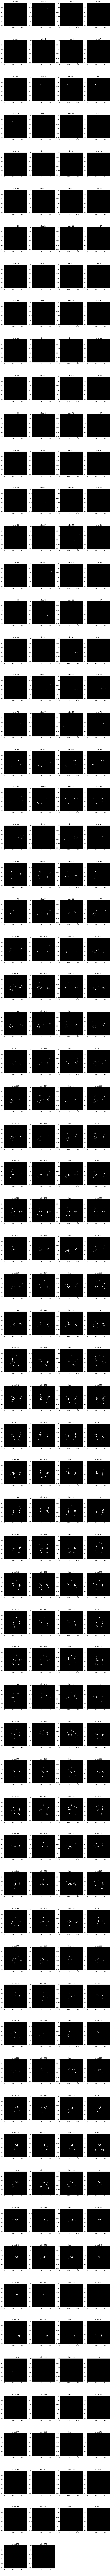

In [ ]:
masks = result[1]
plot_slices(masks)

## Reconstruct candidates mask

In [ ]:
mask_img_3d = np.array(masks)
mask_img_3d.shape

(274, 512, 512)

### Candidates results from y axis

In [ ]:
plot_slices(get_slices(mask_img_3d, axis_index=1))

Output hidden; open in https://colab.research.google.com to view.

## Filter out false candidates from y axis

In [ ]:
def filter_slice_on_y_axis(y_slice, area_th=(48*48),  debug=False):
  if not len(y_slice.nonzero()[0]):
    if debug:
      print(f"[SKIP] - empty mask at slice ")
      return y_slice.astype(bool)
  if debug:
    plt.imshow(y_slice)
    plt.show()

  # Label connected components in the closed image
  labels = measure.label(y_slice)
  properties = measure.regionprops(labels)

  if debug:
    plt.imshow(labels)
    plt.show()

  # Sort regions by area and keep those larger than a threshold
  detected_objects = [obj for obj in properties if obj.area < area_th and obj.area] # area filtering
  detected_objects = [obj for obj in detected_objects if obj.eccentricity > 0.75] # eccentricity (circularity) filtering
  detected_objects = [obj for obj in detected_objects if obj.solidity > 0.65] # solidity filtering

  # Create an empty image to hold the result
  filtered_image = np.zeros_like(y_slice, dtype=bool)

  # Fill in the regions of the relevant objects
  for prop in detected_objects:
      if debug:
        print(f"label: {prop.label}")
        print(f"area: {prop.area}")
        print(f"eccentricity: {prop.eccentricity}")
        print(f"solidity: {prop.solidity}")
      filtered_image[labels == prop.label] = True

  if debug:
    plt.imshow(filtered_image)
    plt.show()

  return filtered_image

In [ ]:
convert_annotation_df(annotations_by_uid(read_in_uid, expanded_annotations_df))

,x,y,z,diam_x,diam_y,diam_z
8,389,270,223,8,8,4


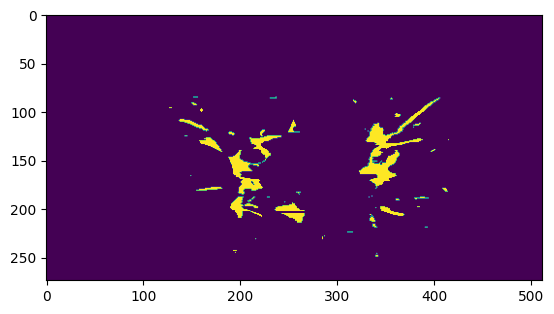

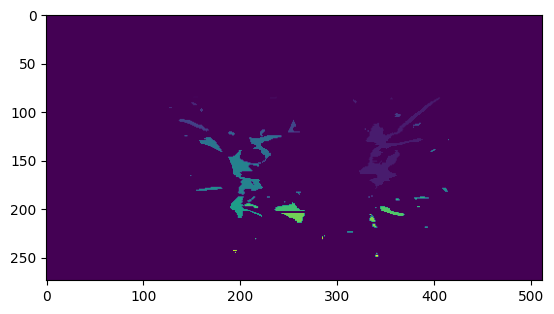

label: 1
area: 5
eccentricity: 1.0
solidity: 1.0
label: 2
area: 8
eccentricity: 0.9905401537573569
solidity: 0.7272727272727273
label: 3
area: 4
eccentricity: 0.7905694150420949
solidity: 1.0
label: 5
area: 8
eccentricity: 0.892775036020812
solidity: 0.8888888888888888
label: 6
area: 11
eccentricity: 0.9381048422158245
solidity: 0.9166666666666666
label: 7
area: 3
eccentricity: 1.0
solidity: 1.0
label: 9
area: 18
eccentricity: 0.7646251689766409
solidity: 0.9
label: 10
area: 103
eccentricity: 0.9922194826247068
solidity: 0.7103448275862069
label: 12
area: 13
eccentricity: 0.9686365157519249
solidity: 0.8125
label: 15
area: 20
eccentricity: 0.8880802817865443
solidity: 0.8
label: 17
area: 17
eccentricity: 0.89513554461048
solidity: 0.8947368421052632
label: 18
area: 3
eccentricity: 1.0
solidity: 1.0
label: 20
area: 141
eccentricity: 0.9279913161249957
solidity: 0.8197674418604651
label: 22
area: 7
eccentricity: 0.9737231303459101
solidity: 0.7777777777777778
label: 25
area: 59
eccentric

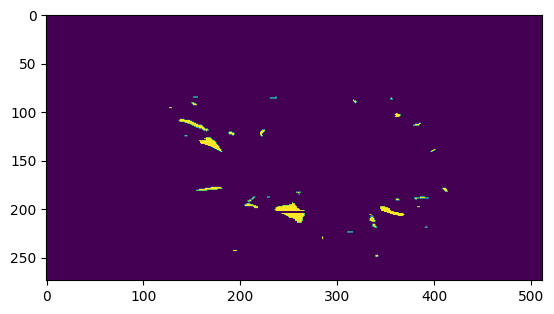

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
y_slice = mask_img_3d[:, 270, :]
filter_slice_on_y_axis(y_slice, debug=True)

In [ ]:
y_filtered_mask_img_3d = process_slices(mask_img_3d, axis_index=1, func=filter_slice_on_y_axis)

In [ ]:
plot_slices(get_slices(y_filtered_mask_img_3d, axis_index=1))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y_filtered_mask_img_3d.shape

(274, 512, 512)

In [ ]:
# Identify connected components
labeled_mask = measure.label(y_filtered_mask_img_3d, connectivity=1)

num_features = labeled_mask.max()

# Calculate the centers of mass for each object
centers = center_of_mass(y_filtered_mask_img_3d, labeled_mask, range(1, num_features + 1))
centers = np.array(centers)


In [ ]:
centers
centers_df = pd.DataFrame({
    "x": np.round(centers[:,2]).astype(int),
    "y": np.round(centers[:,1]).astype(int),
    "z": np.round(centers[:,0]).astype(int),
})
centers_df

,x,y,z
0,345,131,1
1,217,128,9
2,221,132,9
3,171,134,10
4,178,147,10
...,...,...,...
1516,185,292,253
1517,217,284,255
1518,218,249,256
1519,213,284,256


In [ ]:
hit_indexes, hit_indexes_dict = find_neighborhood_indices(centers_df, convert_annotation_df(annotations_by_uid(read_in_uid, expanded_annotations_df)))
hit_indexes_dict

{8: [1309]}

In [ ]:
sensitivity_score(centers_df, convert_annotation_df(annotations_by_uid(read_in_uid, expanded_annotations_df)))

1.0

In [ ]:
raise Exception("STOP IT")

Exception: STOP IT

In [ ]:
def process_slice_candidates2(img_3d, verbose=False, debug=False):
  # Candidate extraction from Z axis
  z_centers_df, masks = process_slice_candidates(img_3d, )

  # Reconstruction of 3d mask
  mask_img_3d = np.array(masks)

  # Filtering out false candidates on Y axis
  y_filtered_mask_img_3d = process_slices(mask_img_3d, axis_index=1, func=filter_slice_on_y_axis)

  # Identify connected components in 3D mask
  labeled_mask = measure.label(y_filtered_mask_img_3d, connectivity=1)

  num_features = labeled_mask.max()

  # Calculate the centers of mass for each object
  centers = center_of_mass(y_filtered_mask_img_3d, labeled_mask, range(1, num_features + 1))
  centers = np.array(centers)

  centers_df = pd.DataFrame({
      "x": np.round(centers[:,2]).astype(int),
      "y": np.round(centers[:,1]).astype(int),
      "z": np.round(centers[:,0]).astype(int),
  })
  return centers_df, z_centers_df



In [ ]:
scores_ = {}
hits_ = {}

for i, uid, in enumerate(image_dict[read_in_subset].keys()):
  print(f"Case {i+1} out of {len(image_dict[read_in_subset].keys())}")

  img_3d = img_by_uid(uid, image_dict)
  print(f"[START] - {uid}")
  centers_y_df, centers_z_df = process_slice_candidates2(img_3d, verbose=True)

  print(f"[Z-axis] - Count: {len(centers_z_df)} ")
  tp_z_i , tp_z_dict = find_neighborhood_indices(centers_z_df, convert_annotation_df(annotations_by_uid(uid, expanded_annotations_df)))
  print(f"[TRUE POSITIVE, Z] - ")
  print(tp_z_dict)

  print(f"[Y-axis] - Count: {len(centers_y_df)}")
  tp_y_i , tp_y_dict = find_neighborhood_indices(centers_y_df, convert_annotation_df(annotations_by_uid(uid, expanded_annotations_df)))
  print(f"[TRUE POSITIVE, Y] - ")
  print(tp_y_dict)

  sensitivity  = sensitivity_score(centers_y_df, convert_annotation_df(annotations_by_uid(uid, expanded_annotations_df)))
  print(f"[SENSITIVITY] - {sensitivity}")
  print(f"[DONE] - {uid}\n")
  scores_[uid] = sensitivity
  hits_[uid] = {"z": tp_z_dict, "y": tp_y_dict}



[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
[Z-axis] - Count: 1452 
[TRUE POSITIVE, Z] - 
{0: [126, 142]}
[Y-axis] - Count: 808
[TRUE POSITIVE, Y] - 
{0: [83]}
[SENSITIVITY] - 1.0
[DONE] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492

[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059
[Z-axis] - Count: 2929 
[TRUE POSITIVE, Z] - 
{1: [1104, 1137, 1168, 1173, 1202, 1207, 1227, 1232, 1266, 1299, 1316, 1323, 1339, 1347, 1367, 1369, 1396, 1421, 1422, 1423, 1450, 1454, 1455, 1479, 1482, 1485, 1508, 1534, 1535, 1568, 1569], 2: [867, 868, 913, 946]}
[Y-axis] - Count: 1487
[TRUE POSITIVE, Y] - 
{1: [624, 625, 626, 641, 642, 695, 757, 767, 775, 776, 798, 814, 834, 838, 839, 872], 2: [509, 511]}
[SENSITIVITY] - 1.0
[DONE] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059

[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987
[Z-axis] - Count: 5292 
[TRUE POSITIVE, Z] - 
{3: [438, 457,

In [ ]:
scores_
av_score = 0

for i in scores_.values():
  av_score += i

av_score/len(scores_.values())

0.9074626865671641

In [ ]:
sen_z = 0
sen_y = 0
count = 0

for i in hits_.values():
  for z in (i["z"].values()):
    count +=1
    if len(z):
      sen_z += 1
  for y in (i["y"].values()):
    if len(y):
      sen_y += 1

print(f"sensitivity z: {sen_z/count}")
print(f"sensitivity y: {sen_y/count}")



sensitivity z: 0.9196428571428571
sensitivity y: 0.9017857142857143
